In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [112]:
td=pd.read_csv('Titanic_train.csv')
td.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [113]:
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [114]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [115]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
td['Age'].replace(np.NaN, td['Age'].mean(), inplace=True)

In [117]:
td_new=td.drop(columns=['Cabin' , 'Embarked'])

In [118]:
td_new.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [119]:
td_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000


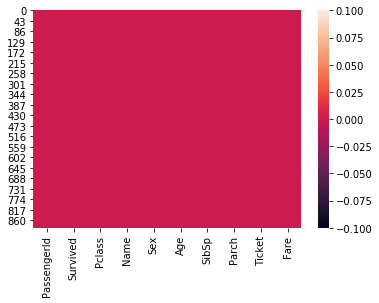

In [120]:
sns.heatmap(td_new.isnull())

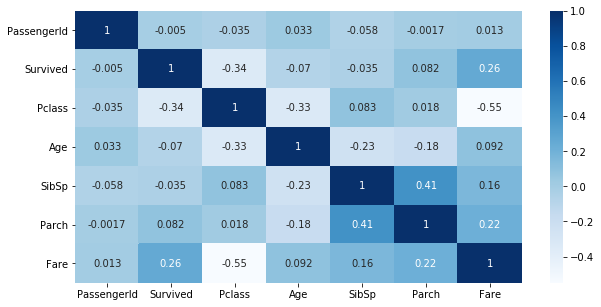

In [121]:
td_new.corr()
plt.figure(figsize=(10,5))
sns.heatmap(td_new.corr(), cmap='Blues', annot=True)

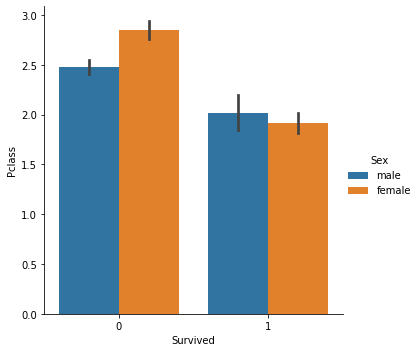

In [122]:
sns.catplot(x='Survived', y='Pclass', hue='Sex', data=td_new, kind='bar')

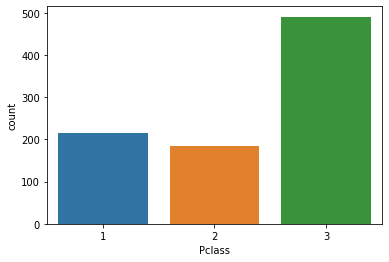

In [123]:
sns.countplot(x='Pclass', data=td_new)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

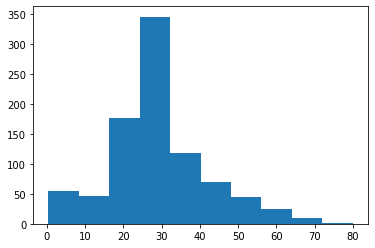

In [124]:
plt.hist(x='Age', data=td_new, bins=10)

In [125]:
td_new.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [126]:
from scipy.stats import boxcox
td_new['Pclass']=boxcox(td_new['Pclass'],0)

In [127]:
td_new.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.848796
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

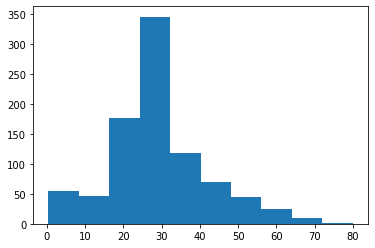

In [128]:
plt.hist(x='Age', data=td_new, bins=10)

{'whiskers': [<matplotlib.lines.Line2D at 0xe72fc08>,
 'caps': [<matplotlib.lines.Line2D at 0xe701f08>,
 'boxes': [<matplotlib.lines.Line2D at 0xe6c3c08>],
 'medians': [<matplotlib.lines.Line2D at 0xe738a88>],
 'fliers': [<matplotlib.lines.Line2D at 0xe738b88>],
 'means': []}

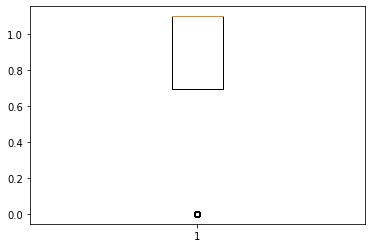

In [129]:
plt.boxplot(td_new.Pclass)

{'whiskers': [<matplotlib.lines.Line2D at 0xe77f5c8>,
 'caps': [<matplotlib.lines.Line2D at 0xe77ff48>,
 'boxes': [<matplotlib.lines.Line2D at 0xe75acc8>],
 'medians': [<matplotlib.lines.Line2D at 0xe782ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0xe786ec8>],
 'means': []}

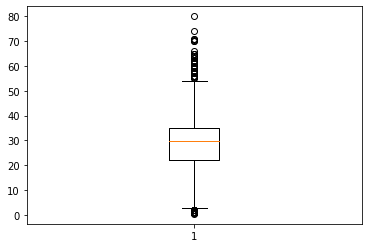

In [130]:
plt.boxplot(td_new.Age)

In [131]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
tn=le.fit_transform(td_new['Sex'])

In [132]:
tnc=td_new.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'PassengerId'])

In [133]:
tnc['Sex'].replace(['male','female'], [0,1], inplace=True)

In [134]:
tnc

,Survived,Pclass,Sex,Age
0,0,1.098612,0,22.000000
1,1,0.000000,1,38.000000
2,1,1.098612,1,26.000000
3,1,0.000000,1,35.000000
4,0,1.098612,0,35.000000
...,...,...,...,...
886,0,0.693147,0,27.000000
887,1,0.000000,1,19.000000
888,0,1.098612,1,29.699118
889,1,0.000000,0,26.000000


In [135]:
from scipy.stats import zscore
z=np.abs(zscore(tnc))
print(z)
print('\n')
tnc_new=tnc[(z<3).all(axis=1)]
tnc_new.head()

[[0.78927234 0.77505103 0.73769513 0.5924806 ]
 [1.2669898  1.65731514 1.35557354 0.63878901]
 [1.2669898  0.77505103 1.35557354 0.2846632 ]
 ...
 [0.78927234 0.77505103 1.35557354 0.        ]
 [1.2669898  1.65731514 0.73769513 0.2846632 ]
 [0.78927234 0.77505103 0.73769513 0.17706291]]




,Survived,Pclass,Sex,Age
0,0,1.098612,0,22.0
1,1,0.000000,1,38.0
2,1,1.098612,1,26.0
3,1,0.000000,1,35.0
4,0,1.098612,0,35.0


In [136]:
x=tnc_new.iloc[:,1:4]
y=tnc_new.iloc[:,0]

In [137]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('accuracy_score')
print(accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('classfication report')
print(classification_report(y_test,y_pred))

accuracy_score
0.768361581920904


Confusion Matrix
[[95 21]
 [20 41]]


classfication report
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       116
           1       0.66      0.67      0.67        61

    accuracy                           0.77       177
   macro avg       0.74      0.75      0.74       177
weighted avg       0.77      0.77      0.77       177



In [139]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x,y,cv=5)
print(score)
print('\n')
print(score.mean())
print('\n')
print(score.std())

[0.78531073 0.79661017 0.78531073 0.7740113  0.79545455]


0.7873394966615306


0.008217931431406422


In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [156]:
model=[LogisticRegression(), KNeighborsClassifier(n_neighbors=6) ,GaussianNB() , DecisionTreeClassifier(random_state=3), SVC()]

In [148]:
for m in model:
    print('*********',m,'*********')
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('accuracy_score')
    print(accuracy_score(y_test,y_pred))
    print('\n')
    print('Confusion Matrix')
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print('classfication report')
    print(classification_report(y_test,y_pred))

********* LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) *********
accuracy_score
0.768361581920904


Confusion Matrix
[[95 21]
 [20 41]]


classfication report
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       116
           1       0.66      0.67      0.67        61

    accuracy                           0.77       177
   macro avg       0.74      0.75      0.74       177
weighted avg       0.77      0.77      0.77       177

********* KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform') *********
accuracy_score
0.807909604

In [158]:
from sklearn.externals import joblib
joblib.dump(KNeighborsClassifier(),'knn_Titanic.pkl')

['knn_Titanic.pkl']